# Download videos for building a dataset

In [1]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=5):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [11]:
urls = search_images('car traffic', max_images=1)
urls[0]

Searching for 'car traffic'


/Users/marcusnsr/miniconda3/envs/AoM/lib/python3.10/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/Users/marcusnsr/miniconda3/envs/AoM/lib/python3.10/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/Users/marcusnsr/miniconda3/envs/AoM/lib/python3.10/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://get.pxhere.com/photo/road-traffic-highway-driving-freeway-transportation-transport-lane-california-parking-lot-infrastructure-cars-los-angeles-residential-area-metropolitan-area-controlled-access-highway-traffic-congestion-622467.jpg'

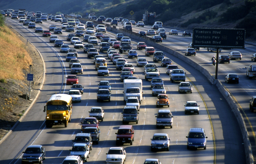

In [12]:
from fastdownload import download_url
dest = 'dataset/motorcycle.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [13]:
searches = 'cars', 'motorcycle', 'truck'
path = Path('/Users/marcusnsr/Desktop/AoM/src/dataset')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} on road'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} parked'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'cars on road photo'
Searching for 'cars on road photo'
Searching for 'cars on road photo'
Searching for 'motorcycle on road photo'
Searching for 'motorcycle on road photo'
Searching for 'motorcycle on road photo'
Searching for 'cars photo'
Searching for 'cars photo'
Searching for 'cars photo'
Searching for 'motorcycle photo'
Searching for 'motorcycle photo'
Searching for 'motorcycle photo'
Searching for 'truck on road photo'
Searching for 'truck on road photo'
Searching for 'truck on road photo'
Searching for 'truck photo'
Searching for 'truck photo'
Searching for 'truck photo'
